# Tema 13: Deep learning

## B - Introducción a las redes neuronales

In [1]:
### EVITAR ERRORES

!uv pip install -q --system numba-cuda==0.4.0

from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

In [2]:
import tensorflow as tf
print("Num GPUs available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs available:  1


__Cargamos los datos__

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


__Exploramos los datos__

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_valid.shape

(10000, 28, 28)

In [6]:
x_train.dtype

dtype('uint8')

In [7]:
x_train.min()

np.uint8(0)

In [8]:
x_train.max()

np.uint8(255)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

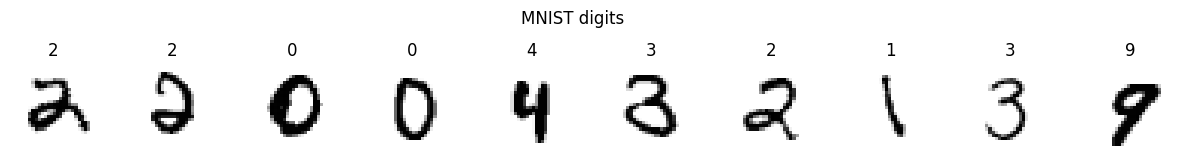

In [10]:
import matplotlib.pyplot as plt
import numpy as np
n_to_show = 10
input_idx = np.random.choice(range(len(x_train)), n_to_show)
input_images = x_train[input_idx]
input_labels = y_train[input_idx]

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.1, wspace=0.4)
for i in range(n_to_show):
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('MNIST digits')
    ax.imshow(input_images[i], cmap='binary')

__Normalizamos y aplanamos el training set__

In [11]:
x_train = x_train / 255
x_valid = x_valid / 255
print(x_train.dtype)
print(x_train.min(), x_train.max())
x_train = x_train.reshape(60000,784)
x_valid = x_valid.reshape(10000,784)
print(x_train.shape)

float64
0.0 1.0
(60000, 784)


__Categorizamos las etiquetas__

In [12]:
import tensorflow.keras as keras
num_categories = 10
y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

__Creamos el modelo__

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

__Entrenamos el modelo__

In [14]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9014 - loss: 0.3151 - val_accuracy: 0.9673 - val_loss: 0.1121
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9752 - loss: 0.0833 - val_accuracy: 0.9745 - val_loss: 0.0867
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0596 - val_accuracy: 0.9784 - val_loss: 0.0897
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9881 - loss: 0.0471 - val_accuracy: 0.9796 - val_loss: 0.0898
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0361 - val_accuracy: 0.9786 - val_loss: 0.1056
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0260 - val_accuracy: 0.9814 - val_loss: 0.0948
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9944 - loss: 0.0205 - val_accuracy: 0.9797 - val_loss: 0.1221
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9948 - loss: 0.0175 -

__Ejercicio: reconocimiento de lenguaje de signos__

In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sign-language-mnist


In [42]:
import pandas as pd
train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
valid_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")
print(train_df.head(n=2))

y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']
x_train = train_df.values
x_valid = valid_df.values

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  

[2 rows x 785 columns]


In [43]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [44]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(27455, 784)
(27455,)
(7172, 784)
(7172,)


<Figure size 640x480 with 0 Axes>

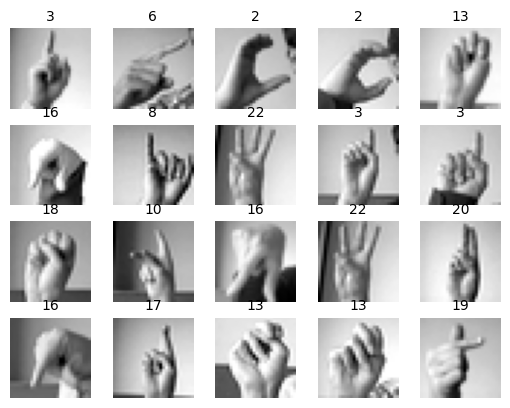

In [45]:
import matplotlib.pyplot as plt
plt.figure()
nfils=4
ncols=5
fig, axes = plt.subplots(nfils, ncols)
for fil in range(nfils):
    for col in range(ncols):
        i = fil*ncols + col
        sign = x_train[i]
        label = y_train[i]
        image = sign.reshape(28,28)
        axes[fil,col].imshow(image, cmap='gray')
        axes[fil,col].set_title(label, fontdict={'fontsize': 10})
        axes[fil,col].axis('off')


In [46]:
print(x_train.min())
print(x_train.max())
print(x_valid.min())
print(x_valid.max())

0
255
0
255


In [47]:
# TODO: normalizar x_train y x_valid

x_train = x_train.astype("float32") / 255.0
x_valid = x_valid.astype("float32") / 255.0

import tensorflow.keras as keras


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
num_classes = 25

# TODO: categorizar y_train y y_valid

y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

#   TODO: construir un modelo secuencial:
#    1. Capa de entrada densa con 512 neuronas, ReLU y esperando 784 parámetros
#    2. Capa oculta densa con 512 neuronas y función de activación ReLU
#    3. Capa de salida densa y función de activación softmax

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),  # 28x28 = 784
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# TODO: entrenar el modelo con 20 epochs

history = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 677,401 (2.58 MB)

 Trainable params: 677,401 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2419 - loss: 2.4916 - val_accuracy: 0.5192 - val_loss: 1.4119
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6342 - loss: 1.0870 - val_accuracy: 0.6035 - val_loss: 1.2072
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7825 - loss: 0.6416 - val_accuracy: 0.7093 - val_loss: 0.9802
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8573 - loss: 0.4307 - val_accuracy: 0.8097 - val_loss: 0.6675
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9075 - loss: 0.2935 - val_accuracy: 0.7401 - val_loss: 1.2132
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9269 - loss: 0.2566 - val_accuracy: 0.7430 - val_loss: 1.3105
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9444 - loss: 0.2150 - val_accuracy: 0.8245 - val_loss: 0.9114
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9565 - loss: 0.1627 - val_accuracy: 0.

## C - Redes neuronales convolucionales

In [48]:
import pandas as pd
import tensorflow.keras as keras

# Carga ficheros .csv
train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
valid_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

# Extrae los valores objetivo
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separa y normaliza vectores de imágenes
x_train = train_df.values
x_valid = valid_df.values
x_train = x_train / 255
x_valid = x_valid / 255

# Categoriza las salidas
num_classes = 25
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [49]:
print(x_train.shape, x_valid.shape)

# Prepara para las CNNs
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

print(x_train.shape, x_valid.shape)

(27455, 784) (7172, 784)
(27455, 28, 28, 1) (7172, 28, 28, 1)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization)
import tensorflow as tf

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264,562 (1.01 MB)

 Trainable params: 264,262 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

In [51]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7592 - loss: 0.8171 - val_accuracy: 0.9254 - val_loss: 0.2943
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9920 - loss: 0.0240 - val_accuracy: 0.8968 - val_loss: 0.4131
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9977 - loss: 0.0073 - val_accuracy: 0.9381 - val_loss: 0.2696
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9982 - loss: 0.0057 - val_accuracy: 0.9543 - val_loss: 0.1514
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9990 - loss: 0.0028 - val_accuracy: 0.9714 - val_loss: 0.0977
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9320 - val_loss: 0.3323
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9216 - val_loss: 0.3076
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9998 - loss: 6.9391e-04 - val_accurac

## D - Data augmentation

In [52]:
import pandas as pd
import tensorflow.keras as keras

# Carga ficheros .csv
train_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
valid_df = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

# Extrae los valores objetivo
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separa y normaliza vectores de imágenes
x_train = train_df.values
x_valid = valid_df.values
x_train = x_train / 255
x_valid = x_valid / 255

# Categoriza las salidas
num_classes = 25
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Prepara para las CNNs
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [53]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
        # Límite de rotación aleatoria en grados
    zoom_range=0.1,
        # Zoom aleatorio entre 1-zoom_range y 1+zoom_range
    width_shift_range=0.1,
        # Desplazamiento horizontal aleatorio (fracción del ancho)
    height_shift_range=0.1,
        # Desplazamiento vertical aleatorio (fracción del ancho)
    horizontal_flip=True,
        # Reflexión horizontal aleatoria
    vertical_flip=False,
        # No reflexión vertical aleatoria
)


# El generador es creado y acoplado al conjunto de entrenamiento
img_iter = datagen.flow(x_train, y_train)
datagen.fit(x_train)

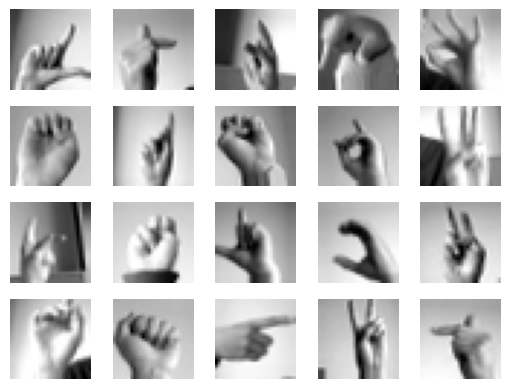

In [55]:
# Muestra el tipo de imágenes que genera
import matplotlib.pyplot as plt
import numpy as np
x, y = next(img_iter)
fig, ax = plt.subplots(nrows=4, ncols=5)
for i in range(20):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image), cmap='gray')
    ax.flatten()[i].axis('off')


In [56]:
# Compila y entrena el modelo
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

# model.fit(x_train, y_train, epochs=20,  validation_data=(x_valid, y_valid))
model.fit(img_iter, epochs=20, validation_data=(x_valid, y_valid))

# Grabamos el modelo
model.save('asl_model.keras')

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.4642 - loss: 1.7788 - val_accuracy: 0.8692 - val_loss: 0.3576
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8730 - loss: 0.3771 - val_accuracy: 0.7423 - val_loss: 0.7929
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9287 - loss: 0.2106 - val_accuracy: 0.9239 - val_loss: 0.2155
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9479 - loss: 0.1639 - val_accuracy: 0.9403 - val_loss: 0.1964
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9564 - loss: 0.1339 - val_accuracy: 0.9642 - val_loss: 0.1038
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9638 - loss: 0.1141 - val_accuracy: 0.9490 - val_loss: 0.1402
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9685 - loss: 0.0952 - val_accuracy: 0.9271 - val_loss: 0.2245
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9701 - loss: 0.0950 - val_accurac

__Ejercicio: inferencia__

In [58]:
from tensorflow import keras
model = keras.models.load_model('asl_model.keras')
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,826 (2.02 MB)

 Trainable params: 264,262 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 264,264 (1.01 MB)

In [59]:
from tensorflow.keras.preprocessing import image as image_utils
image_a = image_utils.load_img('/var/tmp/a.png', color_mode="grayscale", target_size=(28,28))
import matplotlib.pyplot as plt
plt.imshow(image_a, cmap='gray')
plt.show()

image_a = image_utils.img_to_array(image_a)
image_a = image_a.reshape(1,28,28,1)
image_a = image_a / 255

FileNotFoundError: [Errno 2] No such file or directory: '/var/ASLData/a.png'

In [ ]:
prediction = model.predict(image_a)
print(prediction)

In [60]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image as image_utils

alphabet = "abcdefghiklmnopqrstuvwxy"
model = keras.models.load_model('asl_model')
image_file="/var/DL_data/a.png"

def predict_letter(file):
   # image = # TODO: cargar y escalar imagen
    image = image_utils.load_img(file, color_mode="grayscale", target_size=(28, 28))

   # image = # TODO: convertir a array
    image = image_utils.img_to_array(image)

   # image = # TODO: cambiar forma de imagen
    image = image.reshape(1, 784)

  #  image = # TODO: normalizar imagen
    image = image.astype("float32") / 255.0

  #  prediction = # TODO: hacer prediccion
    prediction = model.predict(image)
    predicted_index = np.argmax(prediction)


  #  predicted_letter = # TODO convertir predicción a letra
    predicted_letter = alphabet[predicted_index]

    return predicted_letter

print("Prediction: ",predict_letter(image_file))

ValueError: File format not supported: filepath=asl_model. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(asl_model, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).